# Throughput

## Import Data

In [50]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
from scipy.stats import gmean

sns.set(style="whitegrid", font_scale=1.5)

In [2]:
data_frames = []

for file in glob.glob("*_1.orun.summary.bench"):
    with open(file) as f:
        data = []
        for l in f:
            temp = json.loads(l)
            if 'name' in temp:
                data.append(temp)
        df = pd.json_normalize(data)
        df['variant'] = file.replace("_1.orun.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
#pd.set_option('display.max_rows', df.shape[0]+1)
df

name  \
14     LU_decomposition.1024   
14     LU_decomposition.1024   
40         alt-ergo.fill.why   
40         alt-ergo.fill.why   
16         alt-ergo.yyll.why   
..                       ...   
50  yojson_ydump.sample.json   
28          zarith_pi.10_000   
28          zarith_pi.10_000   
37             zdd.words_txt   
37             zdd.words_txt   

                                              command  time_secs  \
14   taskset --cpu-list 5 ./LU_decomposition.exe 1024   3.921865   
14   taskset --cpu-list 5 ./LU_decomposition.exe 1024   3.922508   
40  taskset --cpu-list 5 alt-ergo benchmarks/alt-e...   0.244185   
40  taskset --cpu-list 5 alt-ergo benchmarks/alt-e...   0.226040   
16  taskset --cpu-list 5 alt-ergo benchmarks/alt-e...  21.275462   
..                                                ...        ...   
50    taskset --cpu-list 5 ./ydump.exe -c sample.json   0.641311   
28        taskset --cpu-list 5 ./zarith_pi.exe 10_000   4.905198   
28        taskset --cpu-list 5 ./zarith_pi.exe 10_000   5.324534   
37           taskset --cpu-list 5 ./zdd.exe words.txt   7.201910   
37           taskset --cpu-list 5 ./zdd.exe words.txt   7.838658   

    user_time_secs  sys_time_secs  maxrss_kB   codesize  \
14        3.884732       0.031940      30040   308920.0   
14        3.888892       0.027948      30040   319680.0   
40        0.202776       0.039760      46800  2627248.0   
40        0.176977       0.048266      46680  2539396.0   
16       20.988587       0.255666     345096  2539396.0   
..             ...            ...        ...        ...   
50        0.571823       0.067979       9932   445304.0   
28        4.626999       0.271706       9952   324604.0   
28        4.954454       0.363592       9948   313244.0   
37        6.867073       0.323391     619864   379276.0   
37        7.492671       0.335492     621764   393384.0   

                                            ocaml_url          ocaml.version  \
14  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
14  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   
40  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   
40  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
16  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
..                                                ...                    ...   
50  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   
28  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   
28  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
37  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
37  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   

   ocaml.c_compiler  ... gc.allocated_words gc.minor_words gc.promoted_words  \
14              gcc  ...         2160065188     2155870814               470   
14              gcc  ...         2160065188     2155870814               470   
40              gcc  ...           35913513       35614598           4210945   
40              gcc  ...           35913500       35614591           4210940   
16              gcc  ...         2632503051     2625862950          62660364   
..              ...  ...                ...            ...               ...   
50              gcc  ...           15863732        9359608           3523211   
28              gcc  ...         1704110131        4058870            121891   
28              gcc  ...         1704110130        4058869            121890   
37              gcc  ...          304534514      270539478          49619223   
37              gcc  ...          304974250      270924537          49704385   

   gc.major_words gc.minor_collections gc.major_collections  \
14        4194844                 8230                    9   
14        4194844                 8230                    9   
40

<hr>

### (USER INPUT)  Baseline variant name

Please choose the baseline variant name for normalized graphs:

In [3]:
baseline = '5.3.0+trunk'

Ensure that the baseline is one of the variants. Returns Raises `ValueError` if the baseline is not present in the loaded data:

In [4]:
is_present = df["variant"].unique().tolist().index(baseline)

<hr>

### Selection example

```
select * from df where variant = baseline and time_secs > 10
```

In [5]:
df.loc[(df['variant'] == baseline) & (df['time_secs'] < 1)]

name  \
40         alt-ergo.fill.why   
50  yojson_ydump.sample.json   

                                              command  time_secs  \
40  taskset --cpu-list 5 alt-ergo benchmarks/alt-e...    0.22604   
50    taskset --cpu-list 5 ./ydump.exe -c sample.json    0.63234   

    user_time_secs  sys_time_secs  maxrss_kB   codesize  \
40        0.176977       0.048266      46680  2539396.0   
50        0.591146       0.039942       9952   429516.0   

                                            ocaml_url          ocaml.version  \
40  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
50  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   

   ocaml.c_compiler  ... gc.allocated_words gc.minor_words gc.promoted_words  \
40              gcc  ...           35913500       35614591           4210940   
50              gcc  ...           15863732        9359608           3523211   

   gc.major_words gc.minor_collections gc.major_collections  \
40        4509849                  142                   10   
50       10027335                  102                  102   

   gc.forced_major_collections gc.heap_words gc.top_heap_words      variant  
40                           0       4359578           4359578  5.3.0+trunk  
50                           0        302924            417260  5.3.0+trunk  

[2 rows x 35 columns]

In [6]:
df.loc[df['name'] == 'LU_decomposition.1024']

name                                           command  \
14  LU_decomposition.1024  taskset --cpu-list 5 ./LU_decomposition.exe 1024   
14  LU_decomposition.1024  taskset --cpu-list 5 ./LU_decomposition.exe 1024   

    time_secs  user_time_secs  sys_time_secs  maxrss_kB  codesize  \
14   3.921865        3.884732       0.031940      30040  308920.0   
14   3.922508        3.888892       0.027948      30040  319680.0   

                                            ocaml_url          ocaml.version  \
14  https://github.com/ocaml/ocaml/archive/refs/he...  5.3.0+dev2-2024-08-25   
14  https://github.com/kayceesrk/ocaml/archive/ref...  5.3.0+dev0-2023-12-22   

   ocaml.c_compiler  ... gc.allocated_words gc.minor_words gc.promoted_words  \
14              gcc  ...         2160065188     2155870814               470   
14              gcc  ...         2160065188     2155870814               470   

   gc.major_words gc.minor_collections gc.major_collections  \
14        4194844                 8230                    9   
14        4194844                 8230                    9   

   gc.forced_major_collections gc.heap_words gc.top_heap_words  \
14                           0       3194889           3194889   
14                           0       3194889           3194889   

            variant  
14      5.3.0+trunk  
14  5.3.0+trunk_bal  

[2 rows x 35 columns]

### Projection example

```
select name, variant, time_secs from df
```

In [7]:
df.filter(['name','variant','time_secs'])

name          variant  time_secs
14     LU_decomposition.1024      5.3.0+trunk   3.921865
14     LU_decomposition.1024  5.3.0+trunk_bal   3.922508
40         alt-ergo.fill.why  5.3.0+trunk_bal   0.244185
40         alt-ergo.fill.why      5.3.0+trunk   0.226040
16         alt-ergo.yyll.why      5.3.0+trunk  21.275462
..                       ...              ...        ...
50  yojson_ydump.sample.json  5.3.0+trunk_bal   0.641311
28          zarith_pi.10_000  5.3.0+trunk_bal   4.905198
28          zarith_pi.10_000      5.3.0+trunk   5.324534
37             zdd.words_txt      5.3.0+trunk   7.201910
37             zdd.words_txt  5.3.0+trunk_bal   7.838658

[104 rows x 3 columns]

## Time

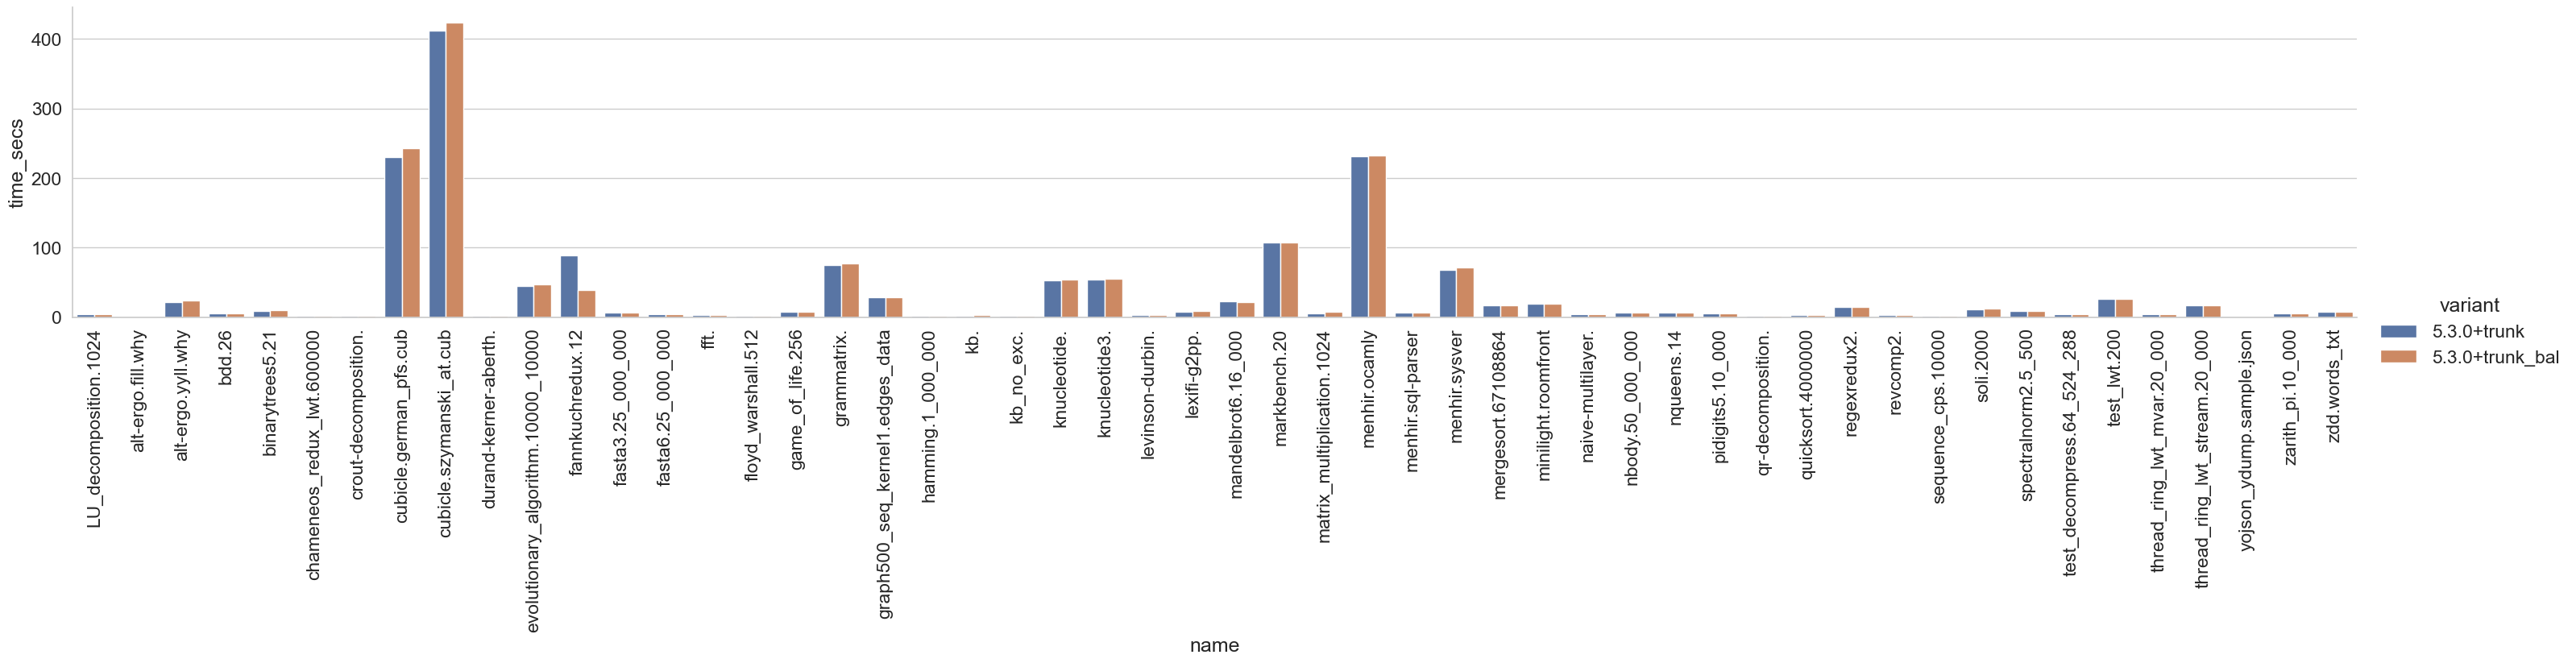

In [8]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

In [59]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#    print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df, baseline, topic, additionalTopics=[]):
    """Normalise the different variant values against the baseline.
    
    The resultant dataframe contains the normalised topic values for all 
    the variants other than the baseline. additionalTopics can be used to 
    include columns other than the topic column in the returned dataframe.
    """
    df = add_display_name(df, baseline, topic)
    items= ['name', topic, 'variant', 'display_name'] + additionalTopics
    df_filtered = df.filter(items=items)
    df_pivot = df_filtered.pivot(index='name', columns='variant', values=[topic])
    baseline_column = (topic, baseline)
    select_columns = [c for c in df_pivot.columns if c != baseline_column]
    normalised = df_pivot.div(df_pivot[baseline_column], axis=0)[select_columns]
    normalised = normalised.melt(col_level=1, ignore_index=False, value_name = 'n' + topic).reset_index()
    if not select_columns:
        print("need another variant to plot normalized graph")
    return pd.merge(normalised, df_filtered, on=['name', 'variant'])

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    y_ticks = g.ax.get_yticks()
    g.ax.set_yticks(y_ticks)  # Explicitly set the y-ticks
    g.ax.set_yticklabels([f"{y + 1:.2f}" for y in y_ticks])
    return g
    # g.ax.set_yscale('log')

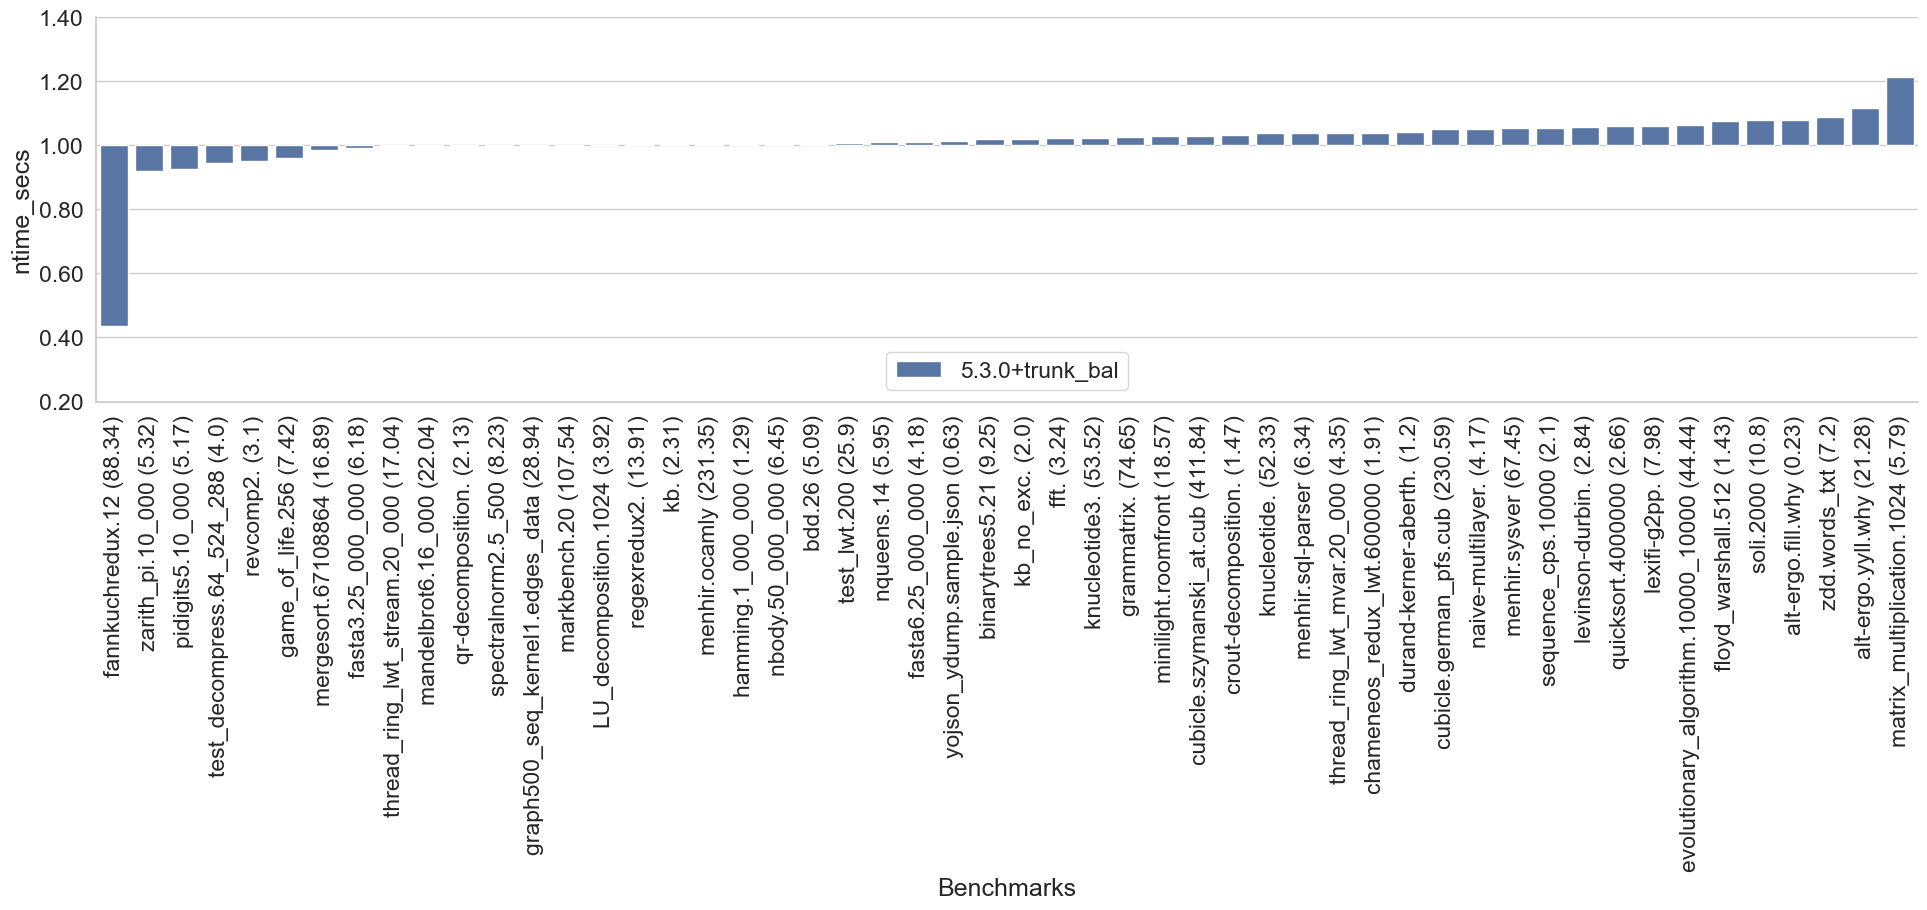

In [60]:
ndf = normalise(df,baseline,'time_secs')
plot_normalised(ndf,baseline,'ntime_secs')

## Top heap words

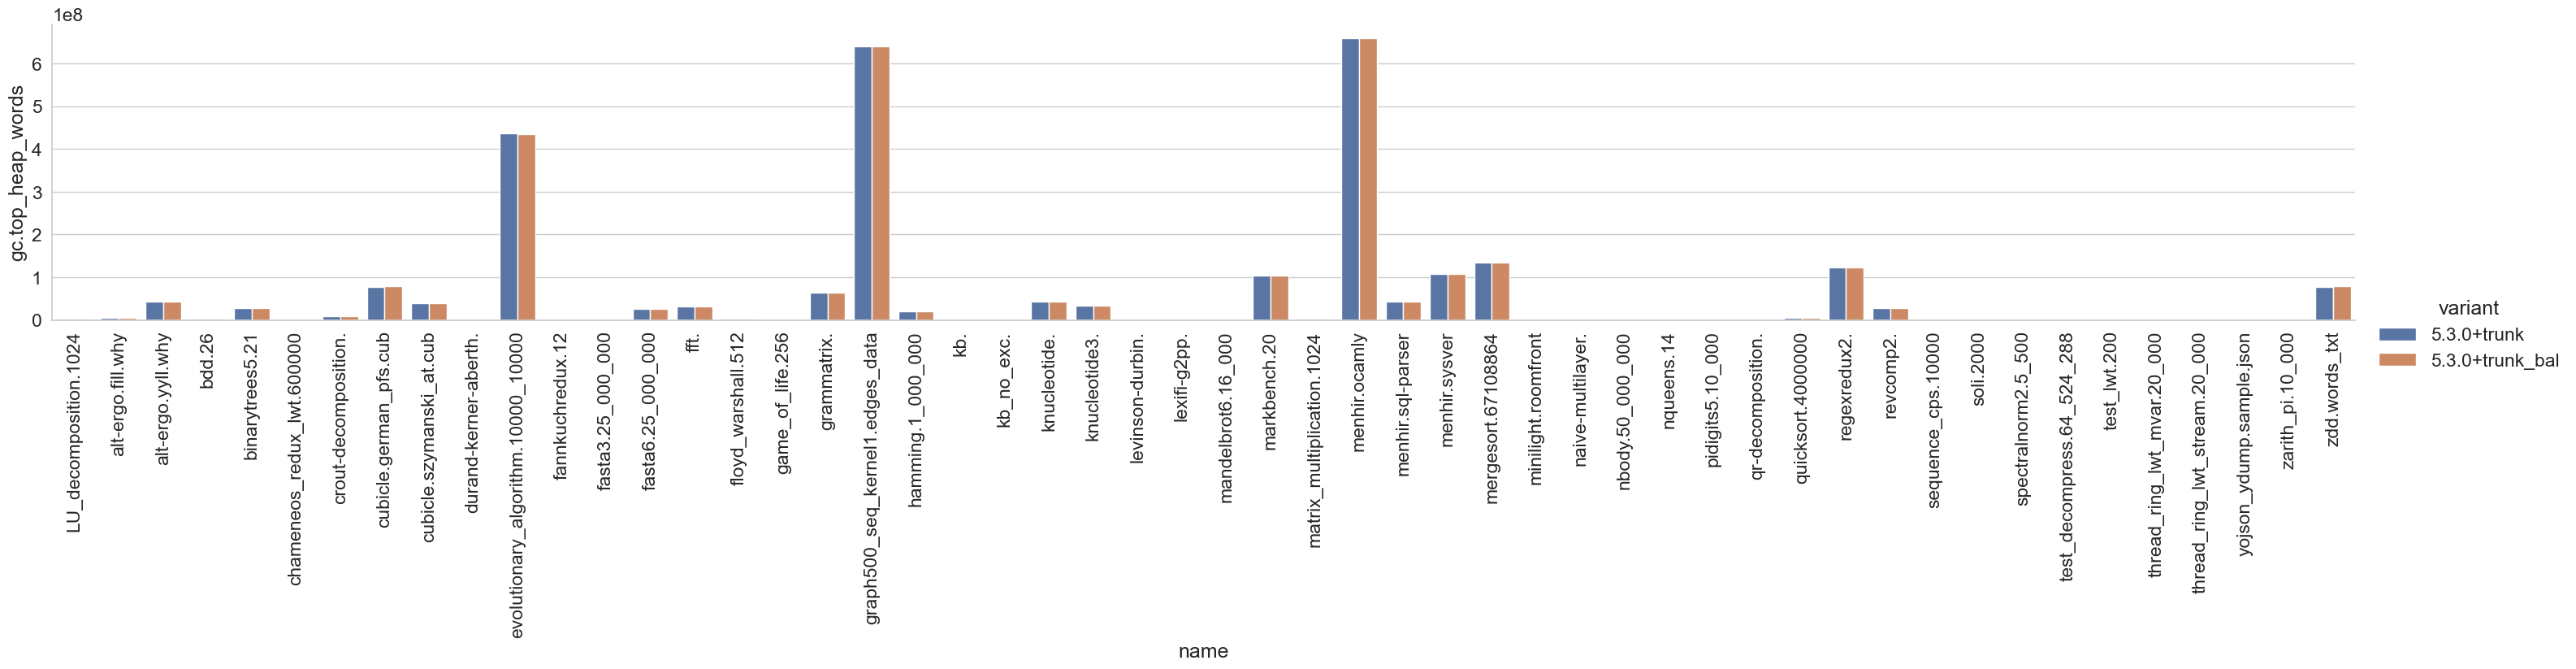

In [37]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

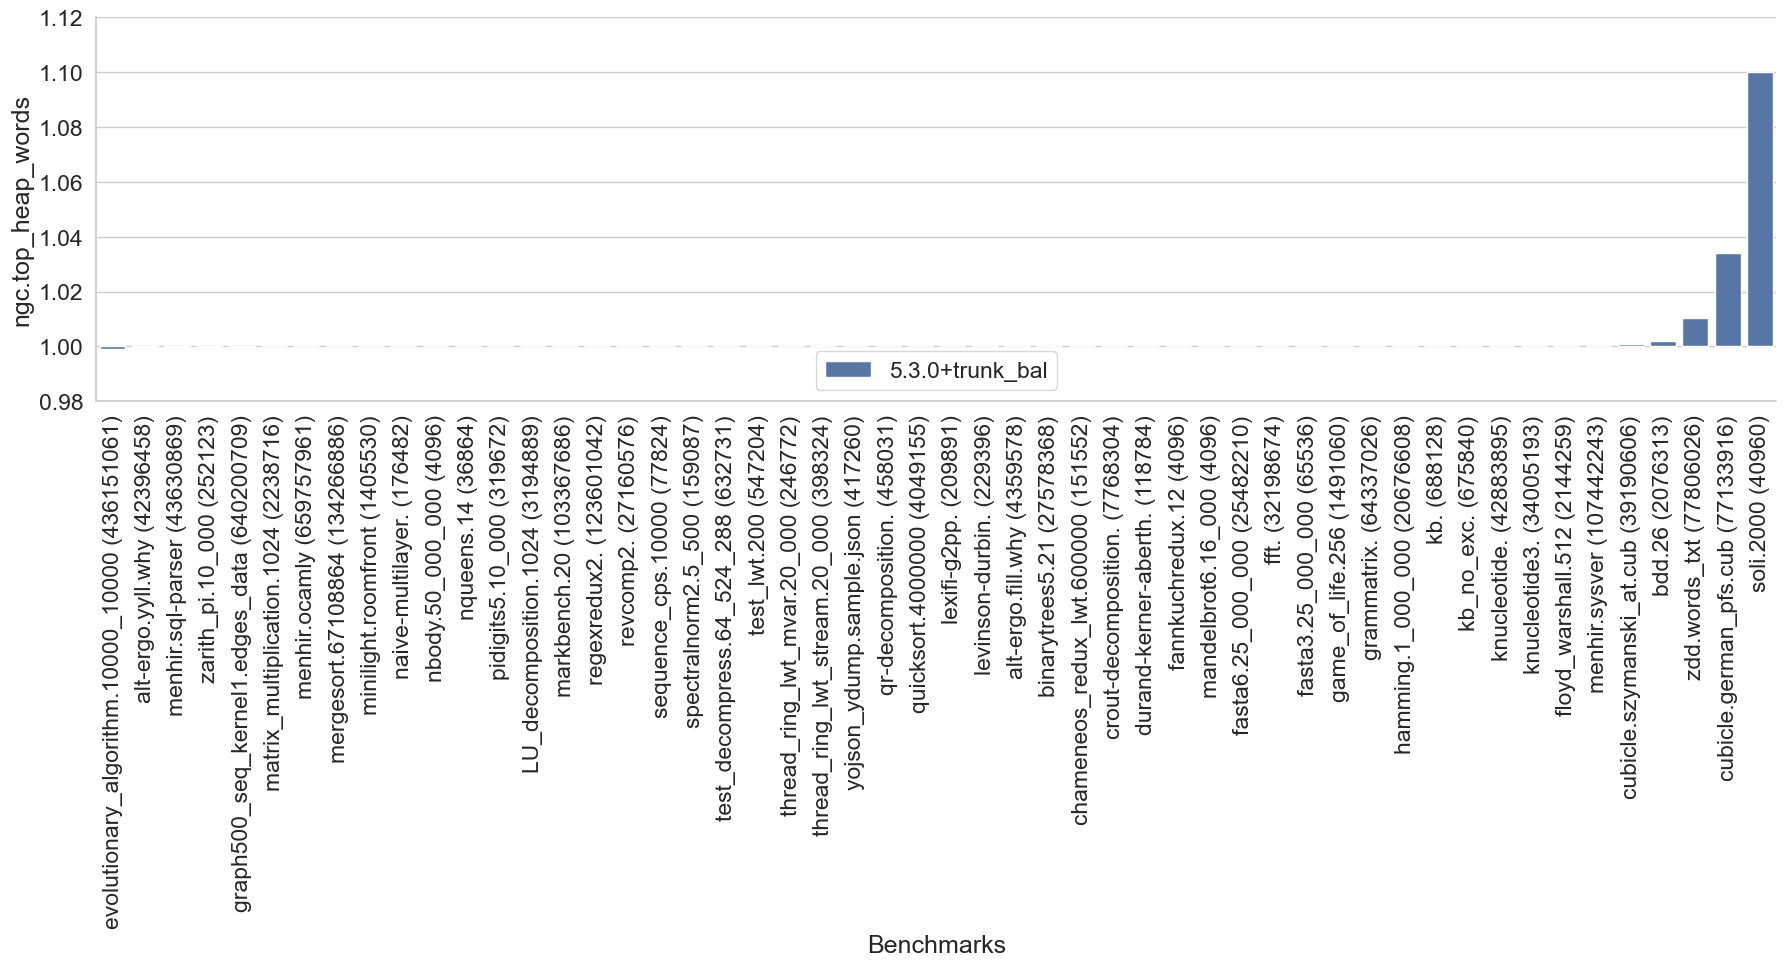

In [38]:
ndf = normalise(df,baseline,'gc.top_heap_words')
plot_normalised(ndf,baseline,'ngc.top_heap_words')

## Max RSS (KB)

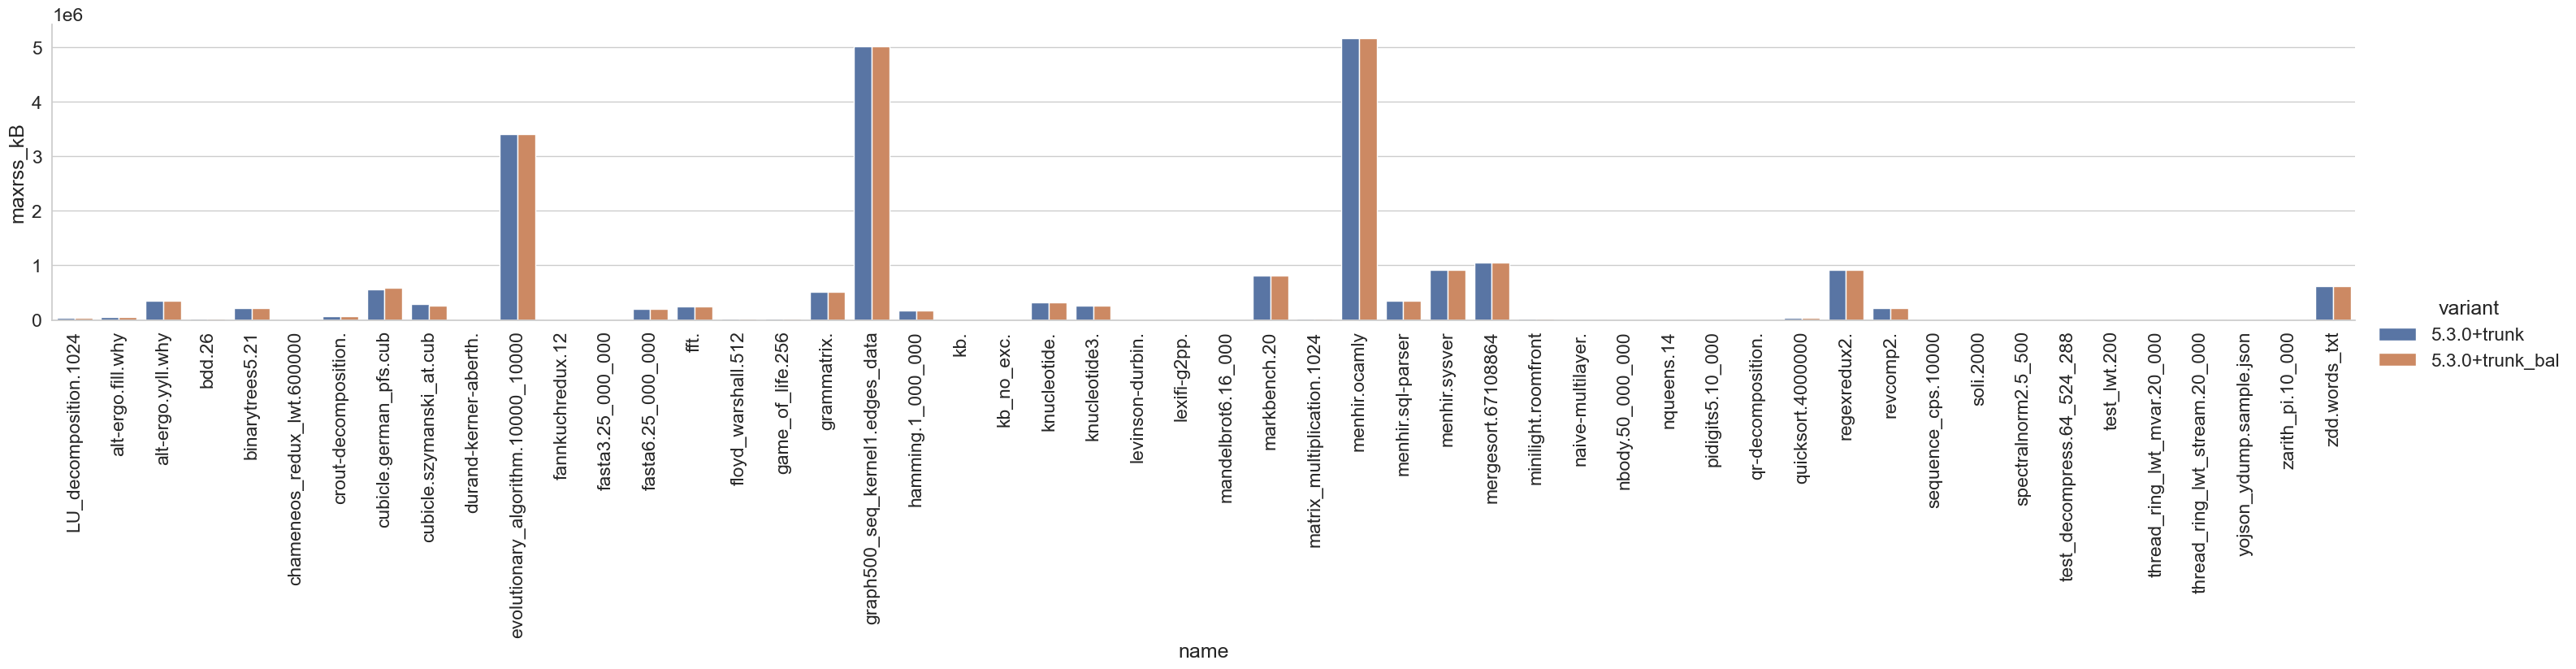

In [39]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

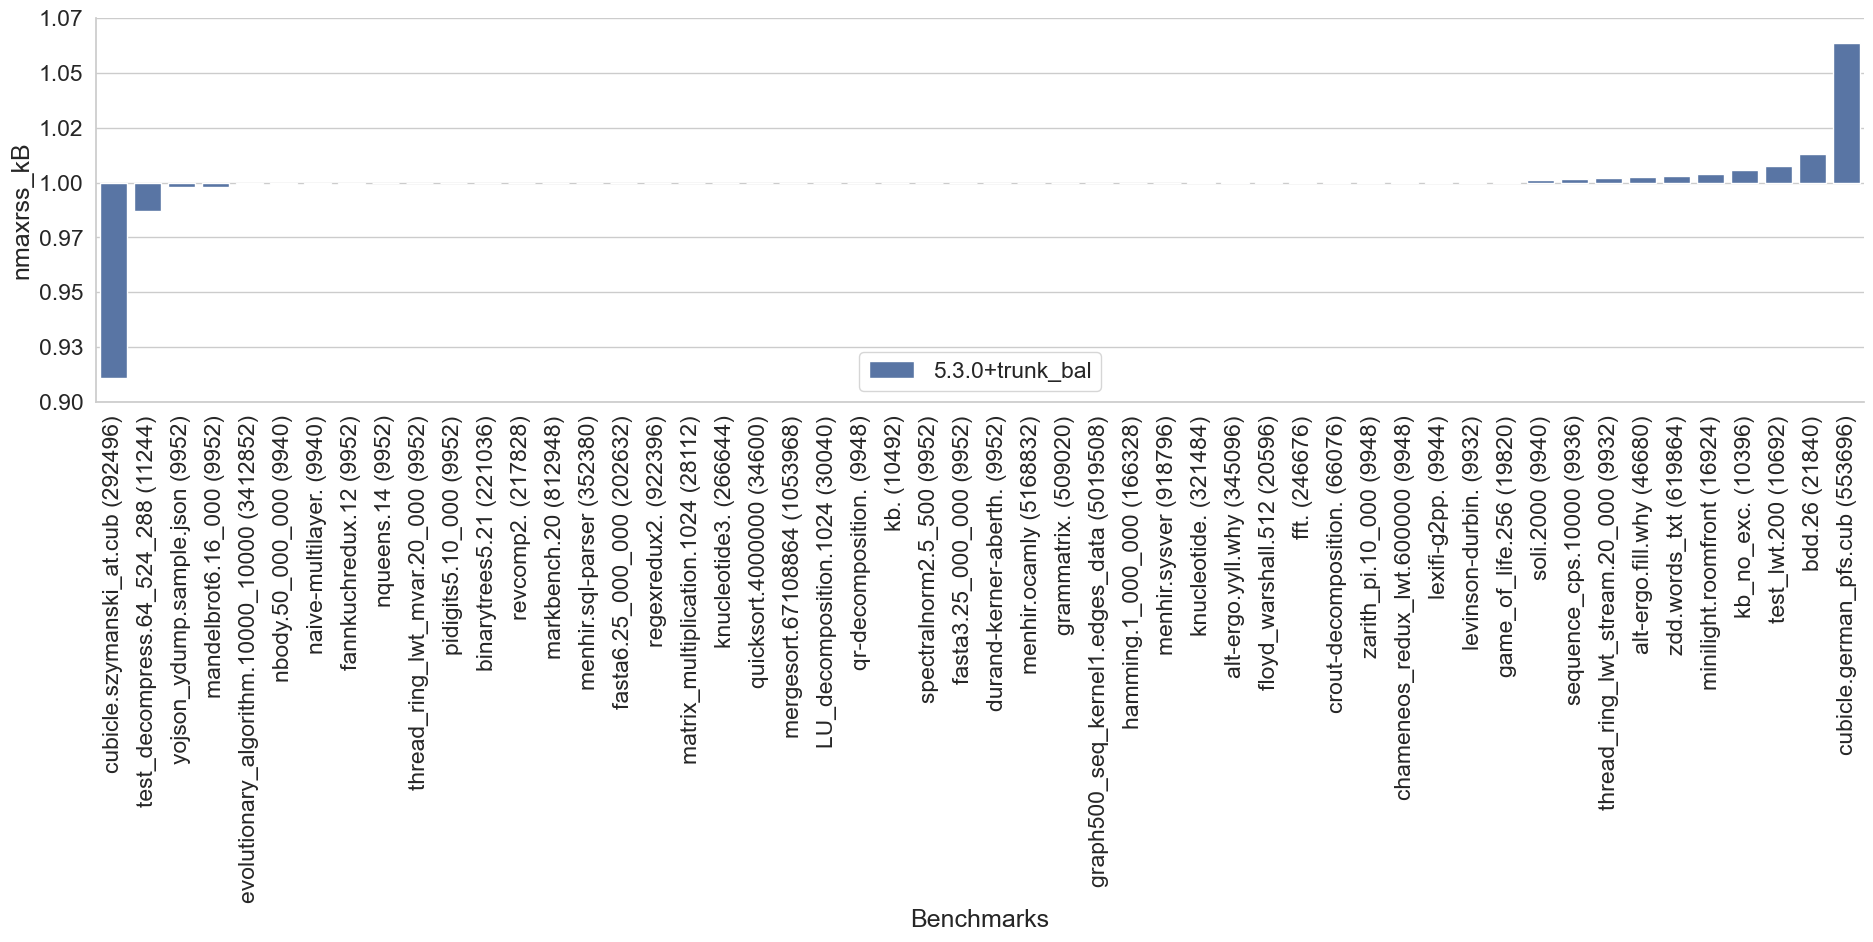

In [40]:
ndf = normalise(df,baseline,'maxrss_kB')
plot_normalised(ndf,baseline,'nmaxrss_kB')

## Major Collections

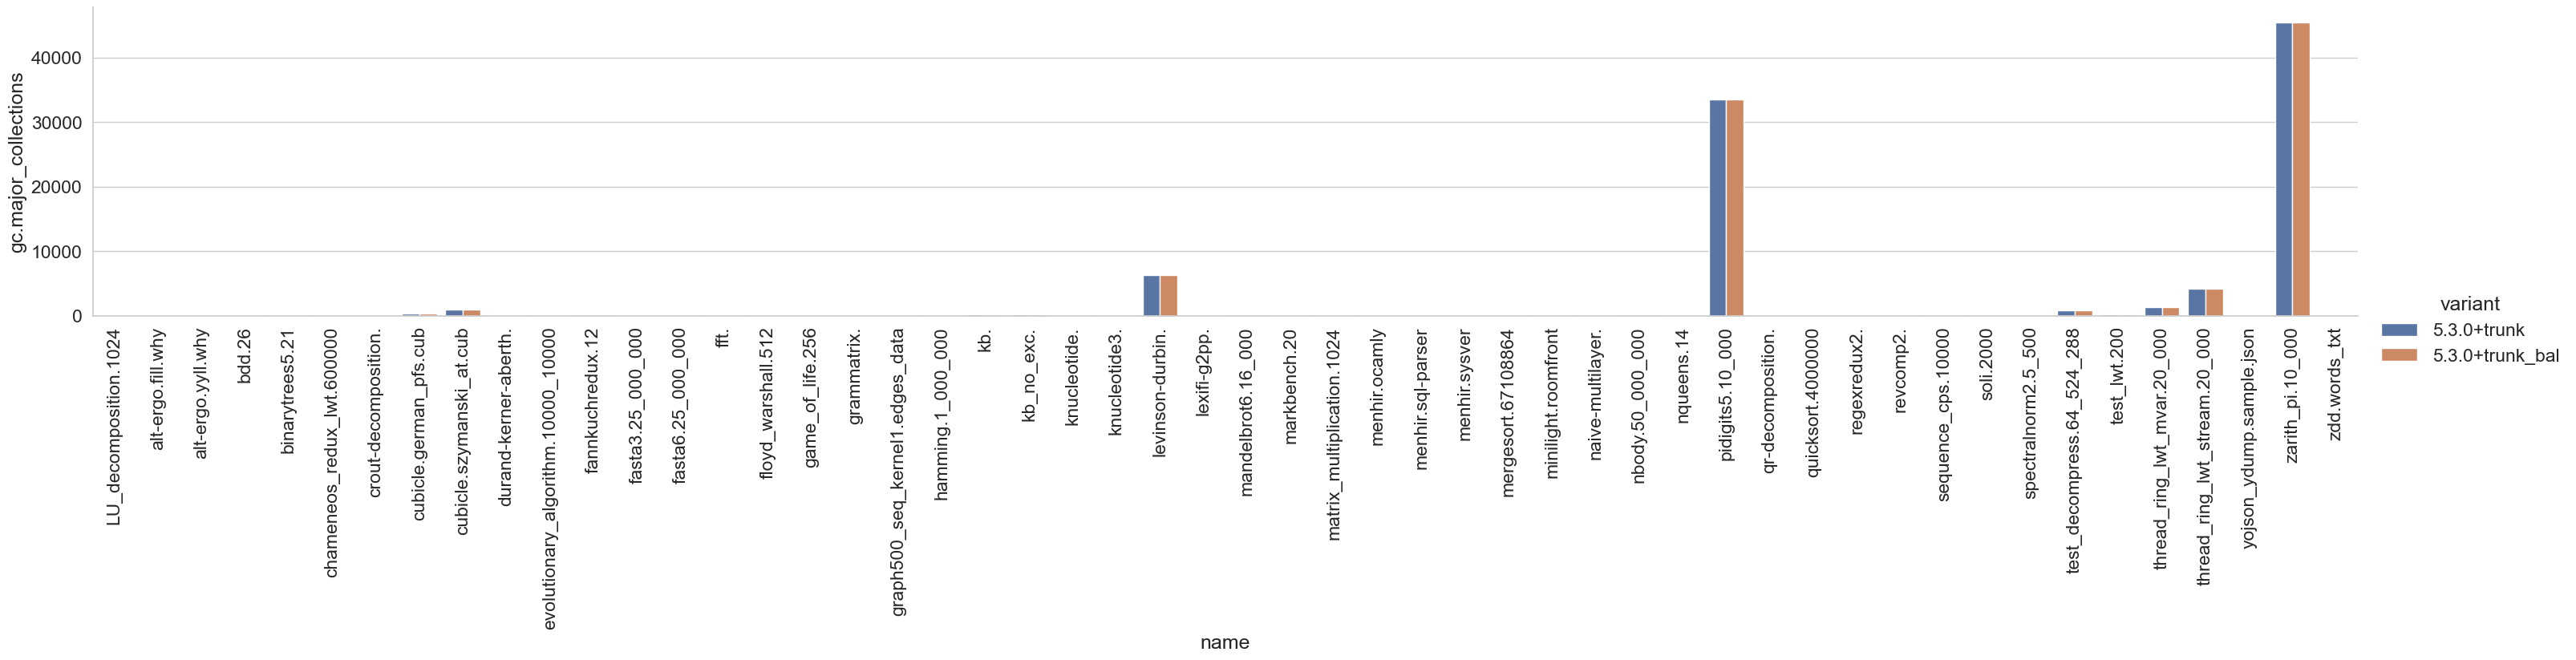

In [41]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

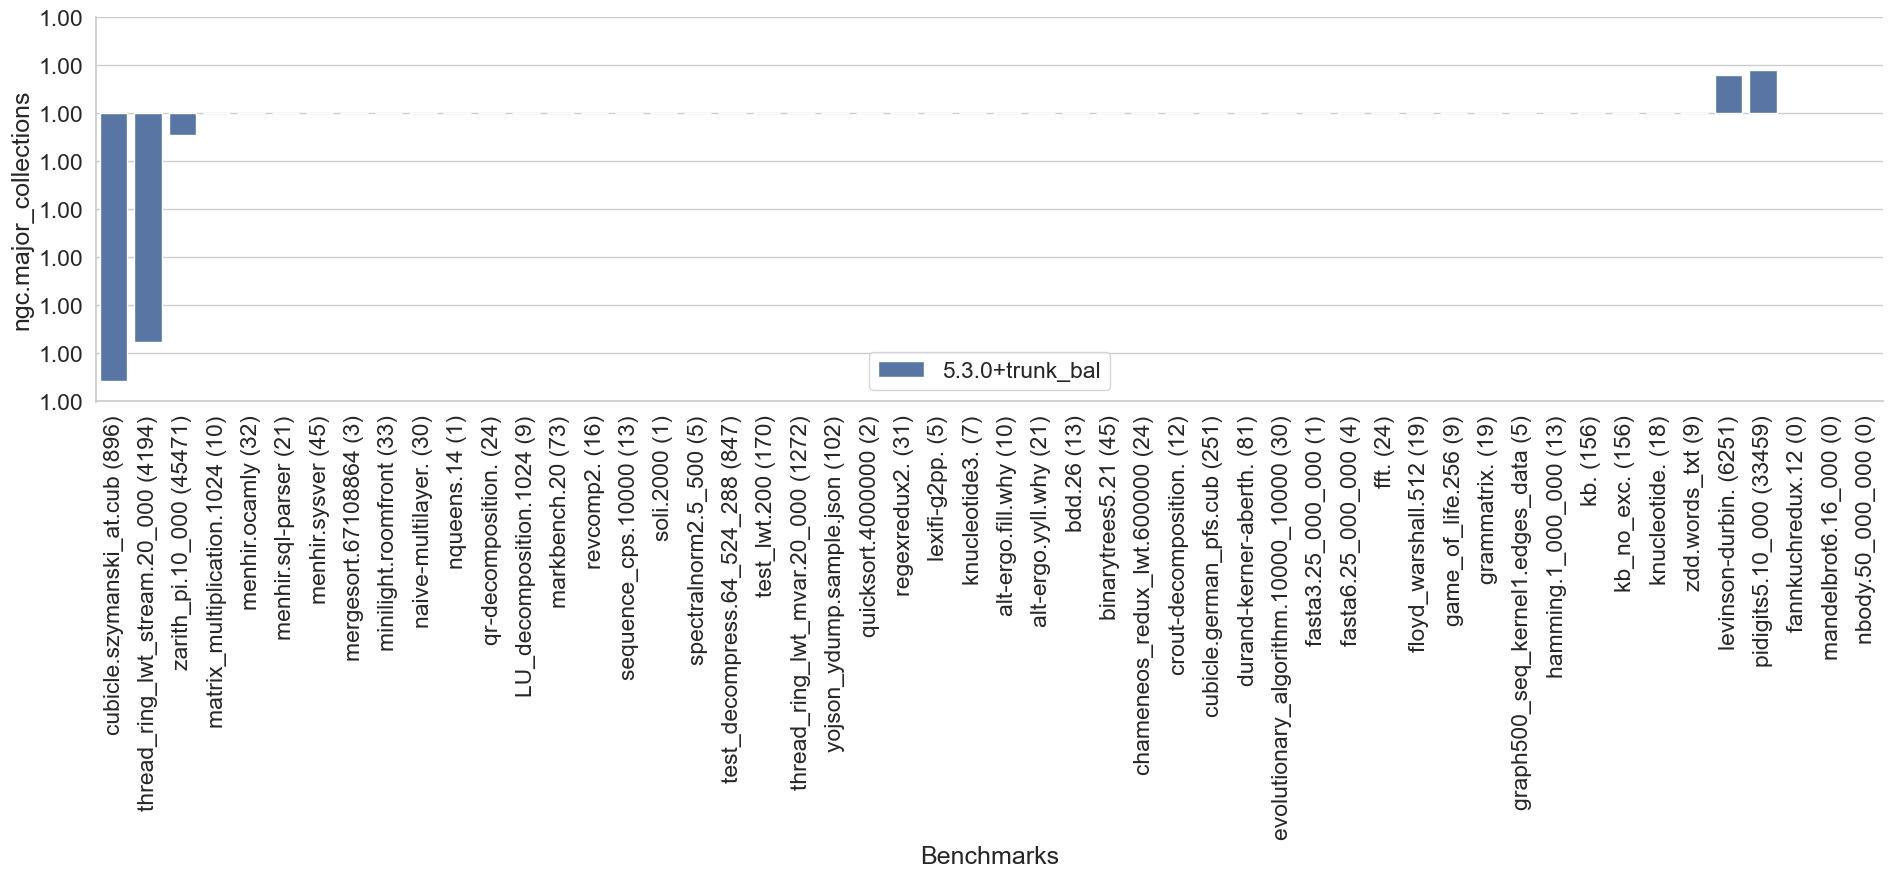

In [42]:
ndf = normalise(df,baseline,'gc.major_collections')
plot_normalised(ndf,baseline,'ngc.major_collections')

## Major words

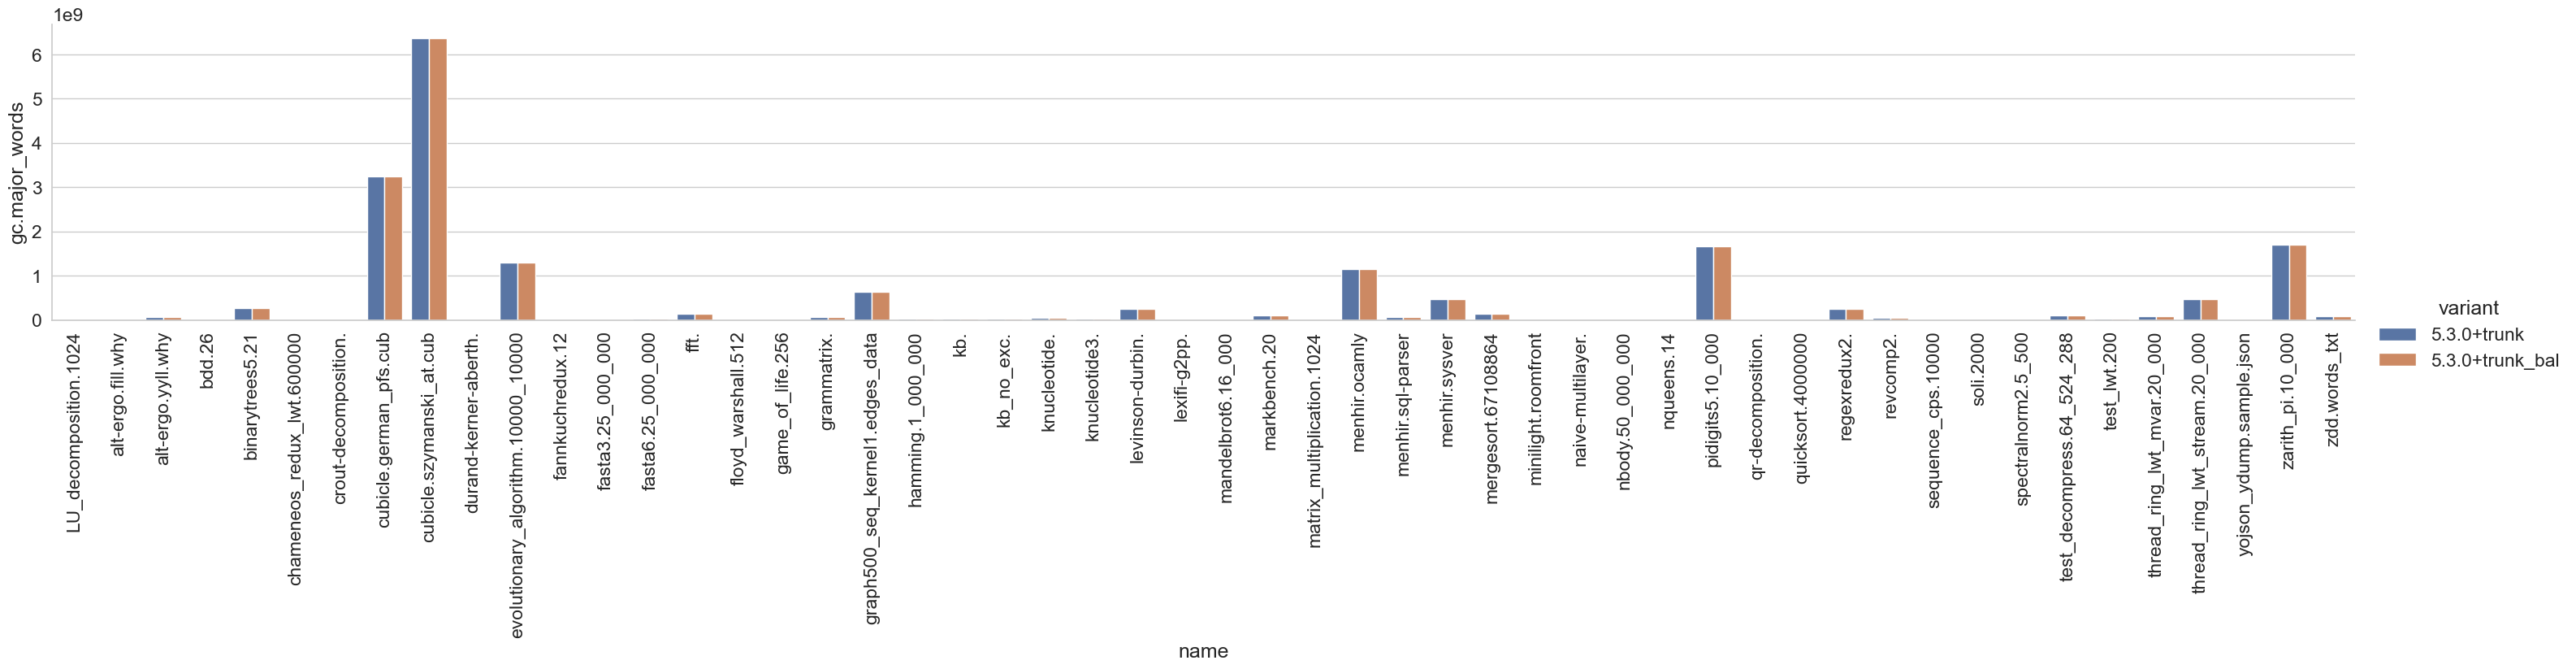

In [43]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

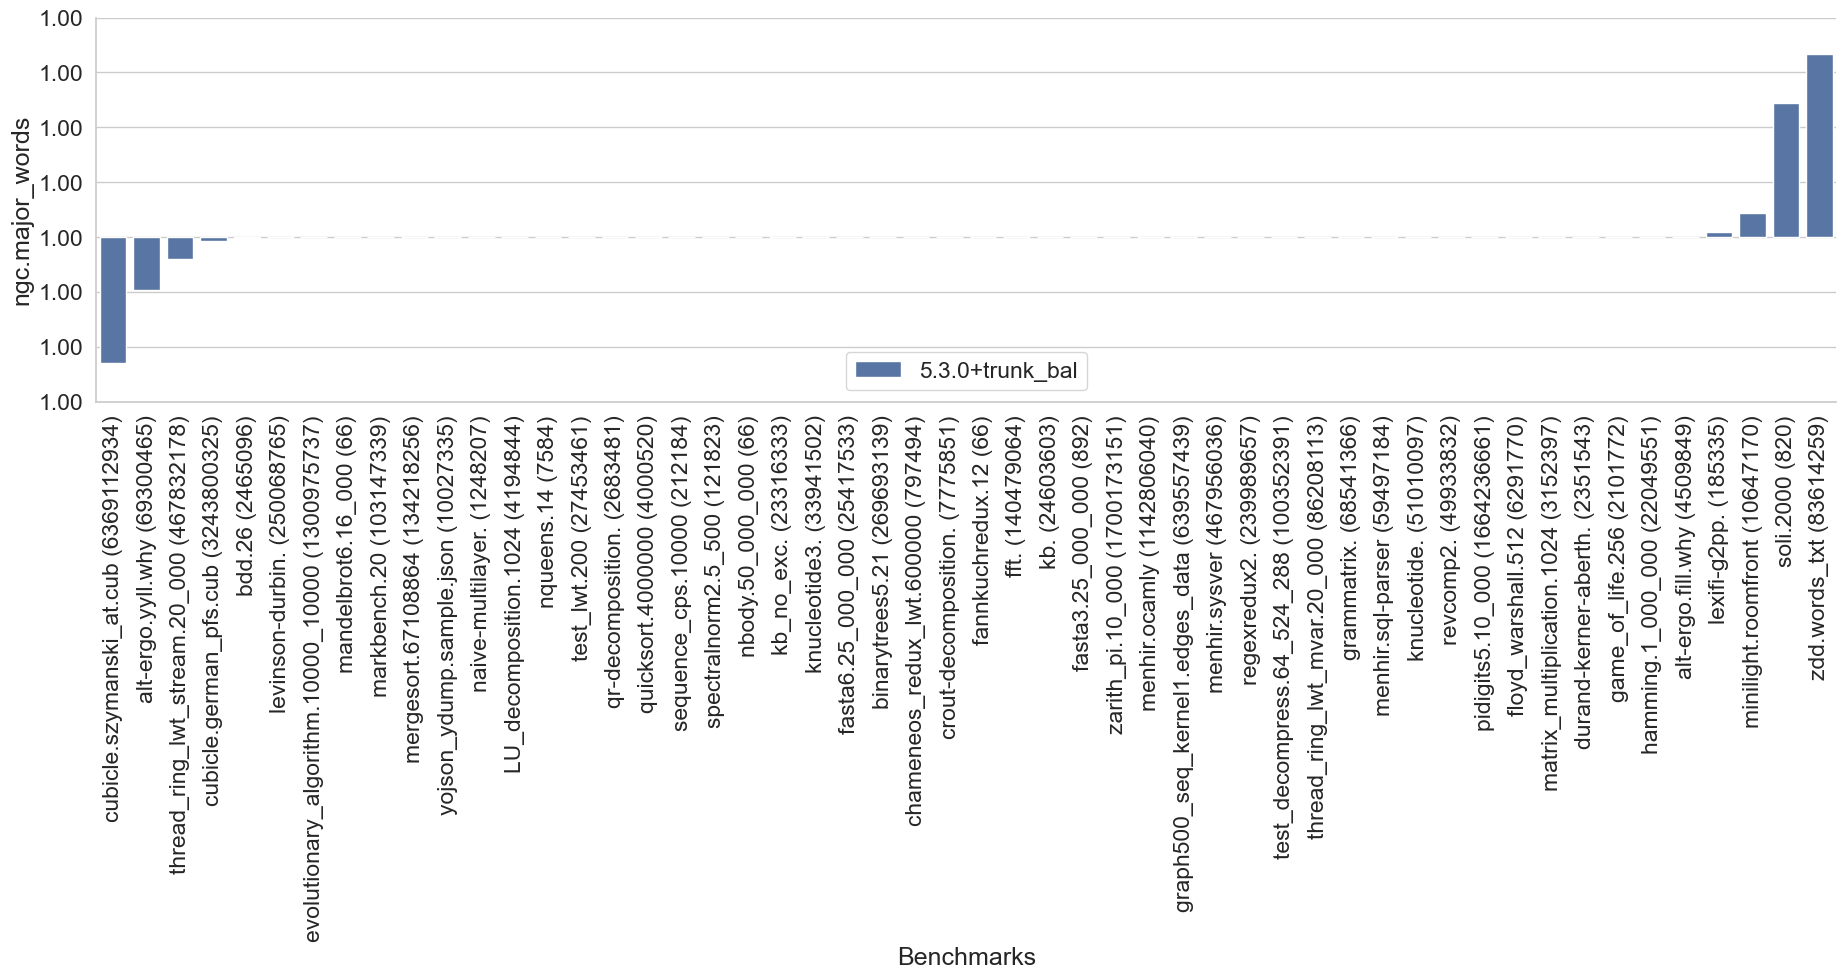

In [44]:
ndf = normalise(df,baseline,'gc.major_words')
plot_normalised(ndf,baseline,'ngc.major_words')

## Minor Collections

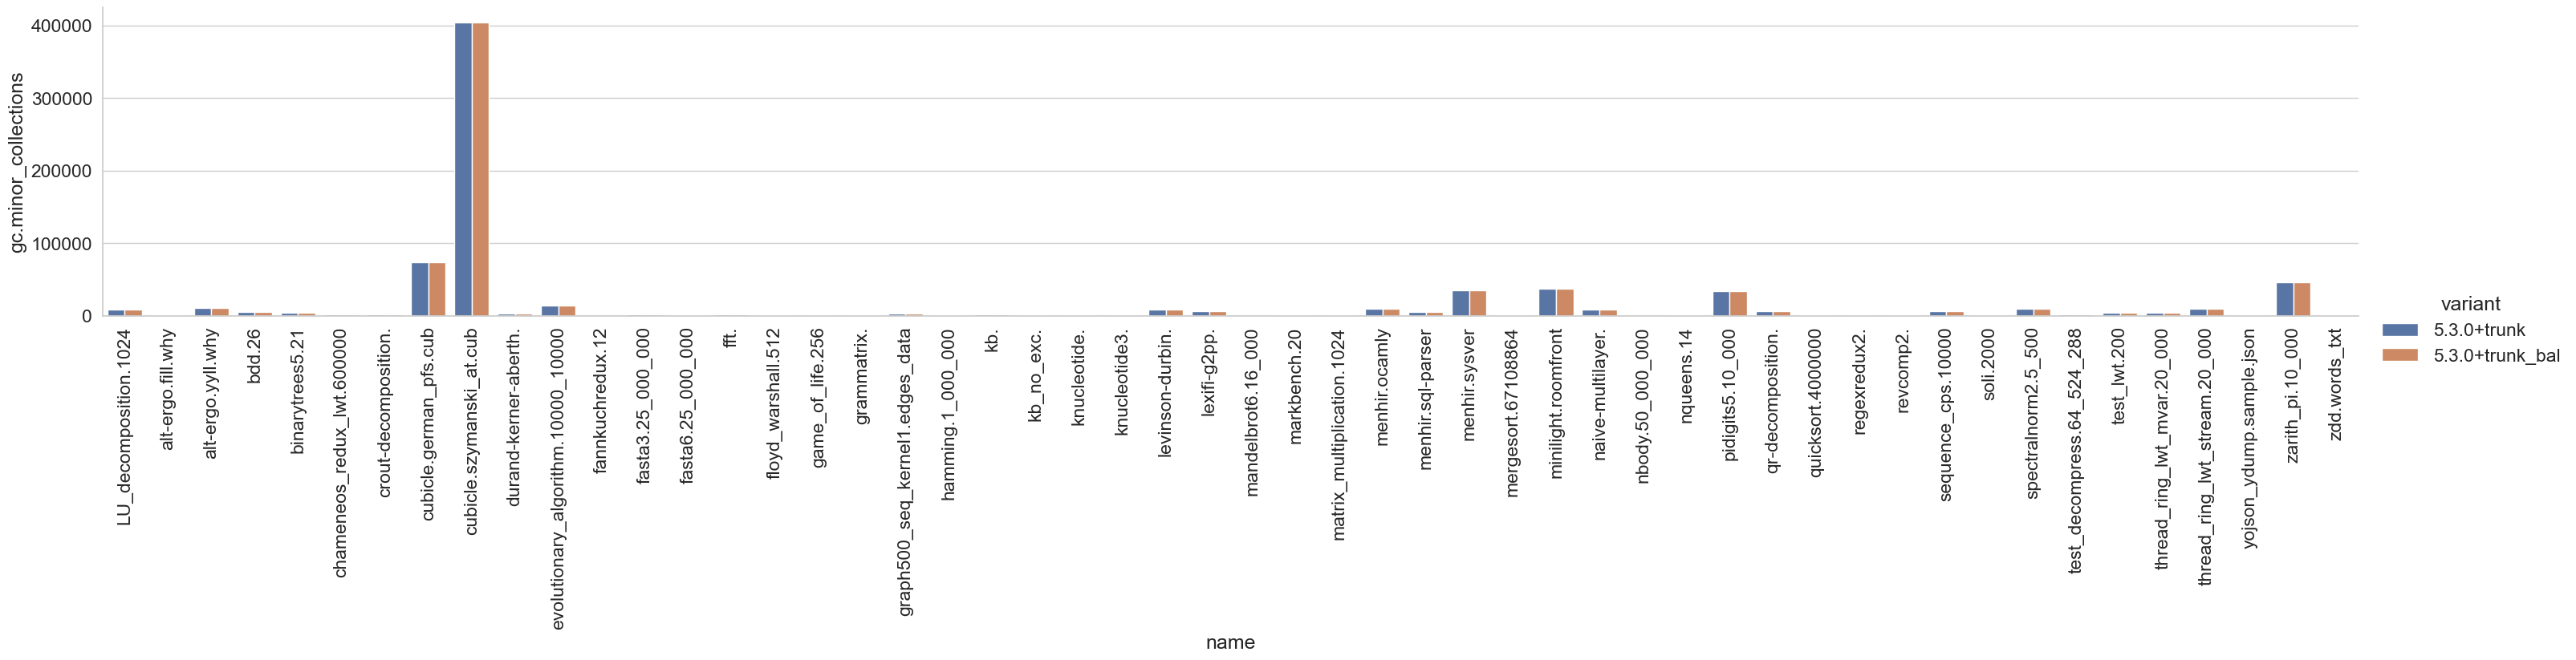

In [45]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

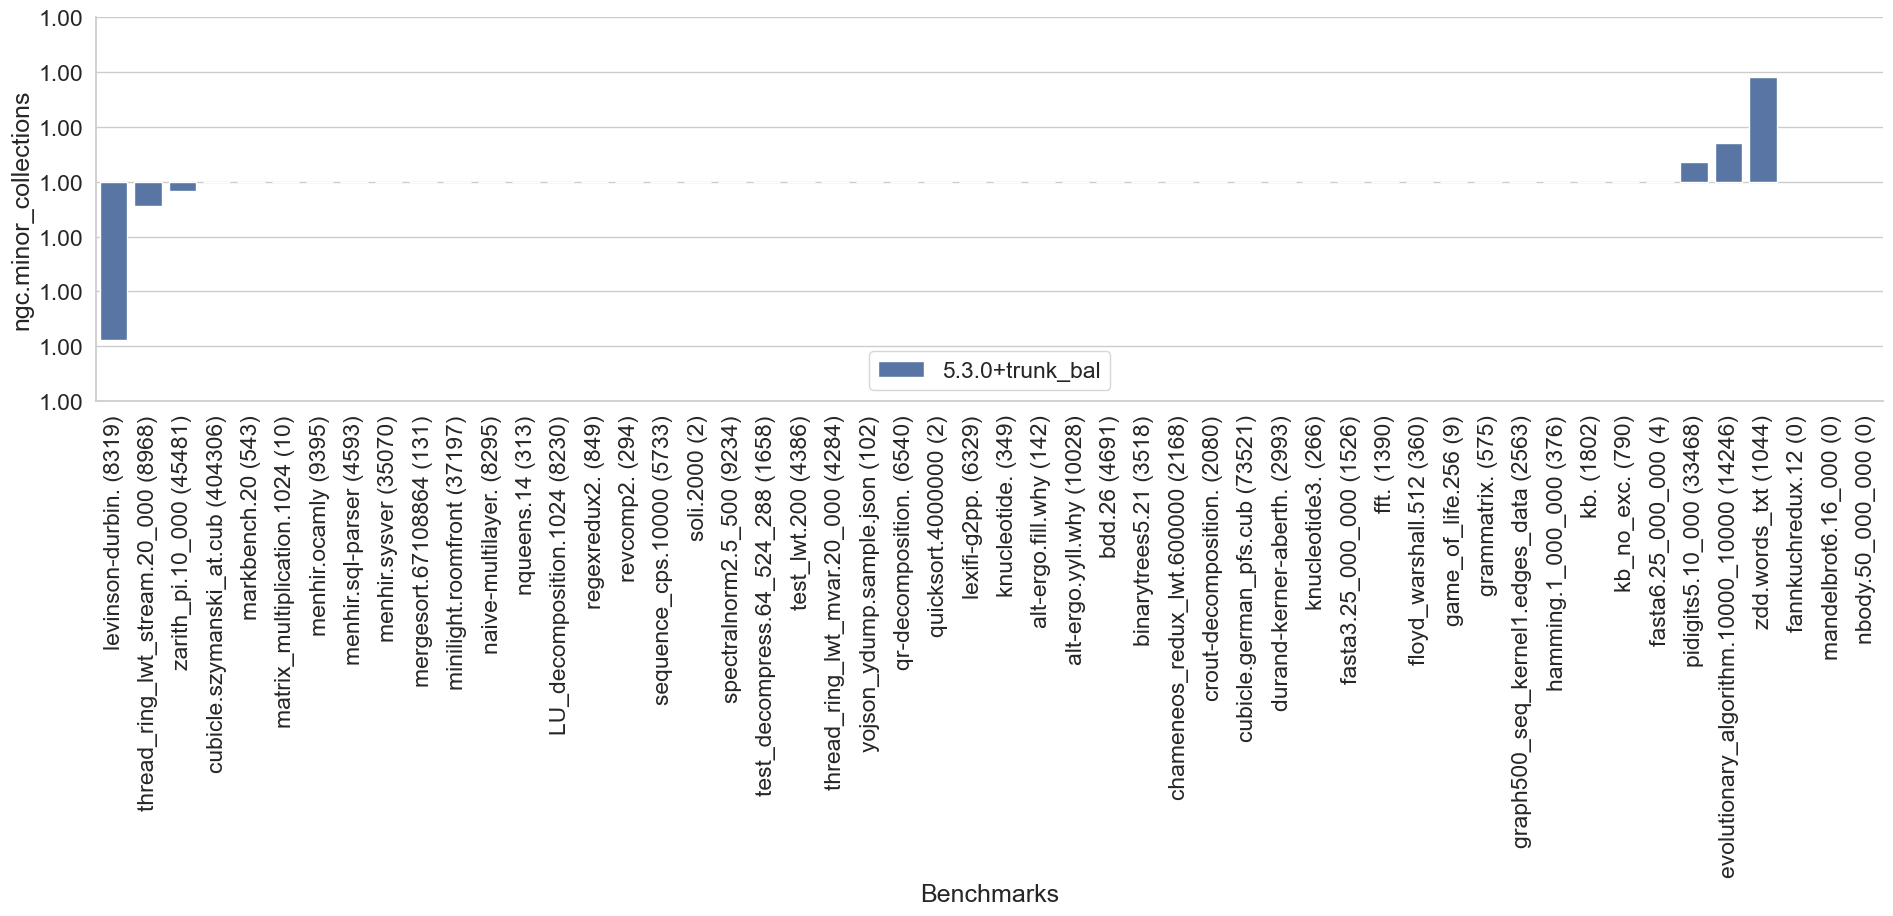

In [46]:
ndf = normalise(df,baseline,'gc.minor_collections')
plot_normalised(ndf,baseline,'ngc.minor_collections')

## Codesize

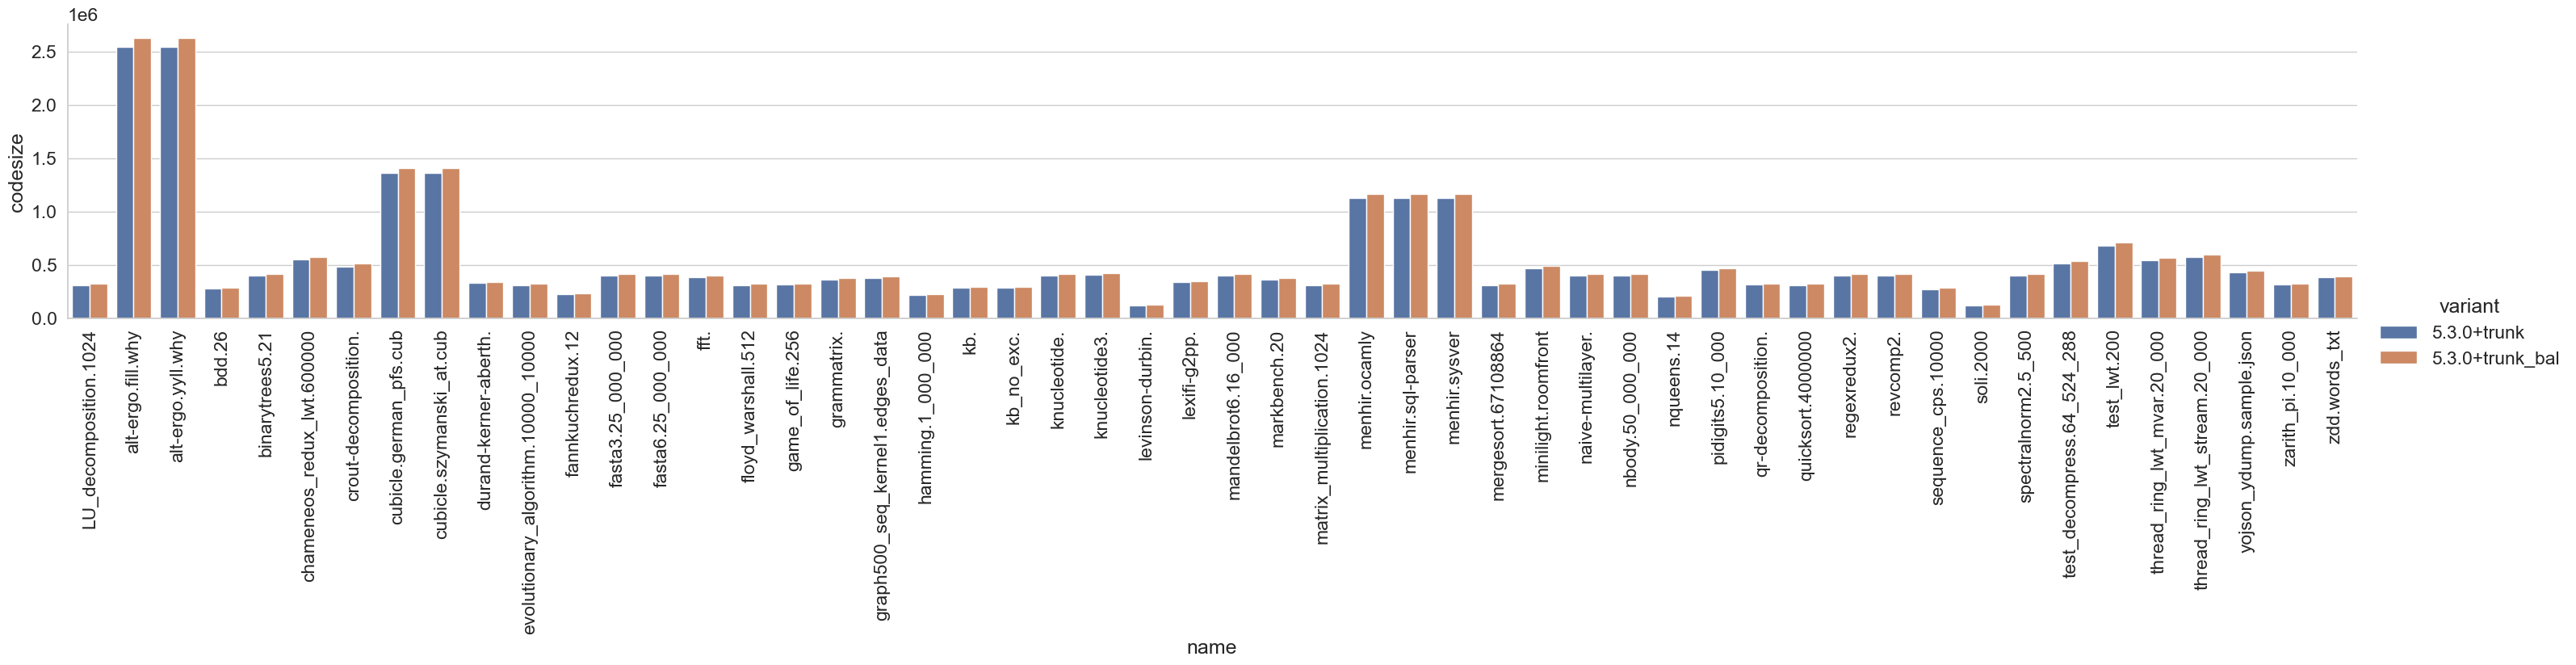

In [47]:
g = sns.catplot (x='name', y='codesize', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

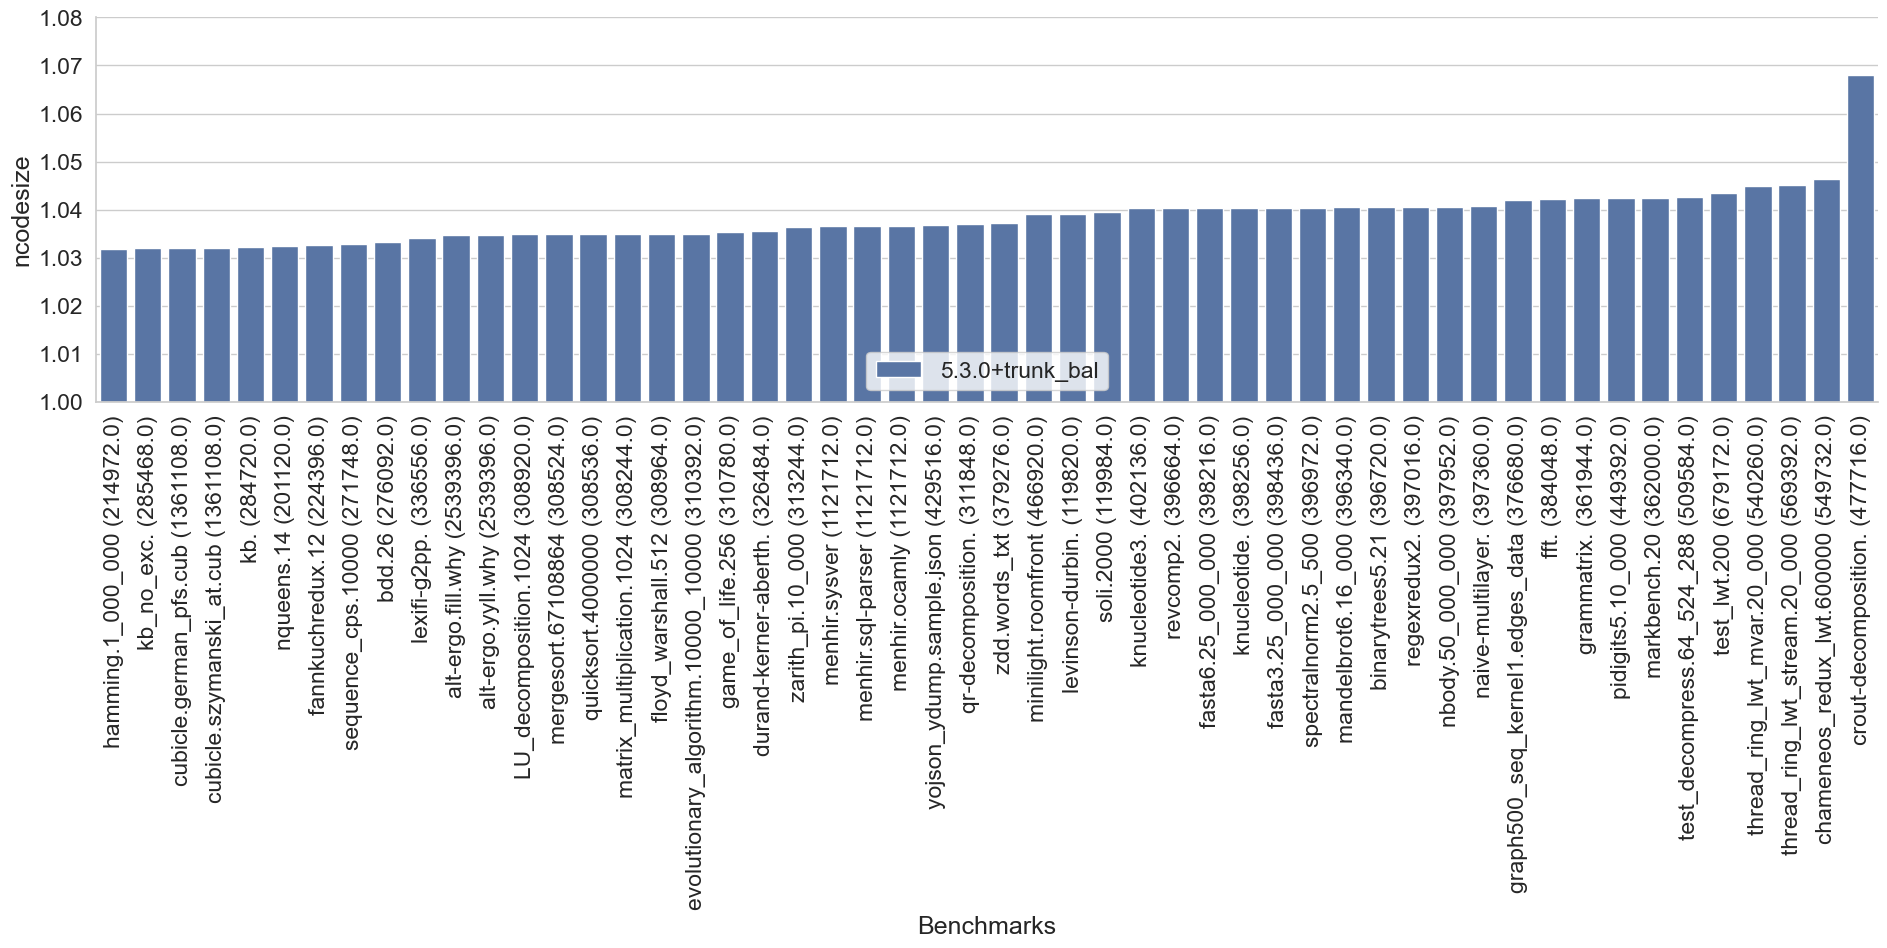

In [48]:
ndf = normalise(df,baseline,'codesize')
plot_normalised(ndf,baseline,'ncodesize')